In [15]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r"C:\Users\leube\Ironhack\Bootcamp\week_5\lab-eda-bivariate\amz_uk_price_prediction_dataset.csv"

df = pd.read_csv(file_path)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [5]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_proportions = crosstab.div(crosstab.sum(axis=1), axis=0)

sorted_crosstab_proportions = crosstab_proportions.sort_values(by=True, ascending=False)

print(sorted_crosstab_proportions)

isBestSeller                         False     True 
category                                            
Grocery                           0.941865  0.058135
Smart Home Security & Lighting    0.942308  0.057692
Health & Personal Care            0.942314  0.057686
Mobile Phone Accessories          0.957529  0.042471
Power & Hand Tools                0.964661  0.035339
...                                    ...       ...
CD, Disc & Tape Players           1.000000  0.000000
General Music-Making Accessories  1.000000  0.000000
Snowboard Boots                   1.000000  0.000000
Boxes & Organisers                1.000000  0.000000
eBook Readers & Accessories       1.000000  0.000000

[296 rows x 2 columns]


In [8]:
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f"chi2: {chi2}")
print(f"p-value: {p}")
print(f"degrees of freedom: {dof}")
n = crosstab.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
print(f"Cramers V: {cramers_v}")

chi2: 36540.20270061387
p-value: 0.0
degrees of freedom: 295
Cramers V: 0.1222829439760564


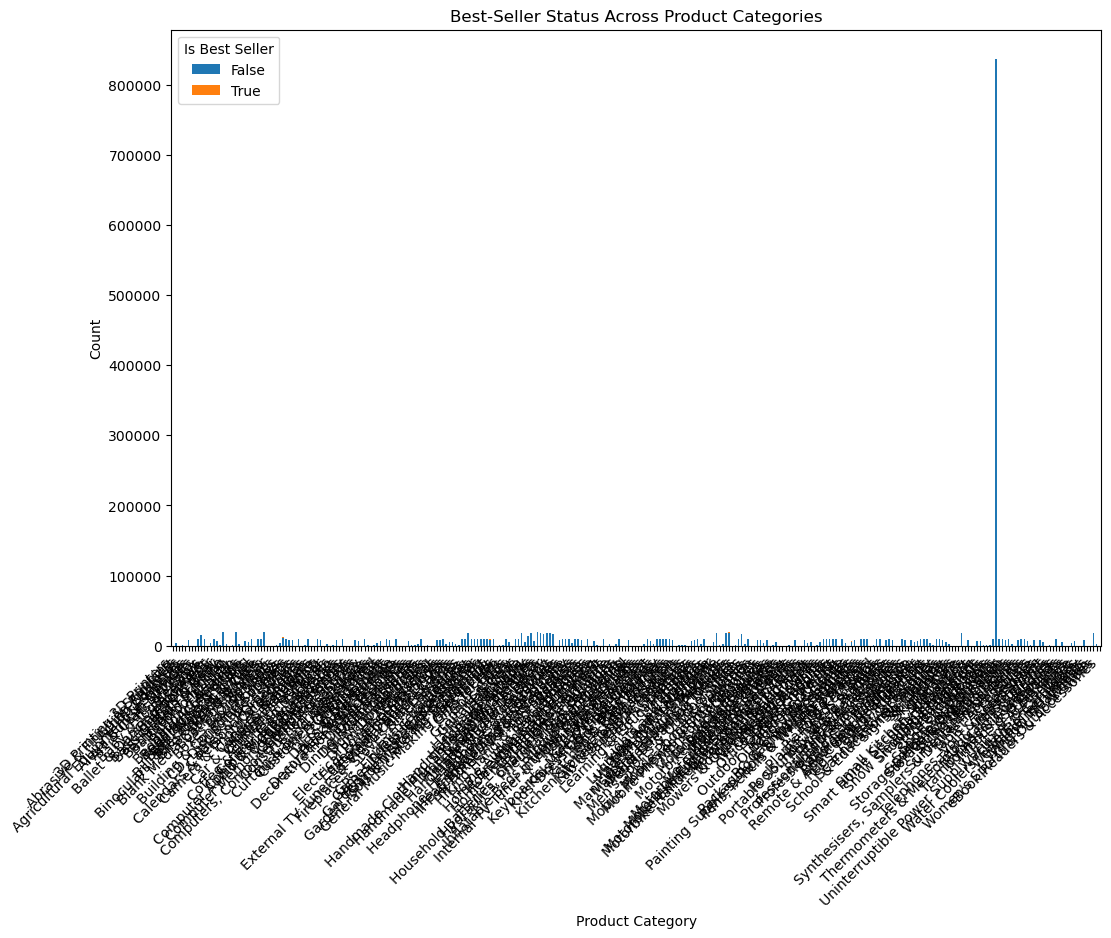

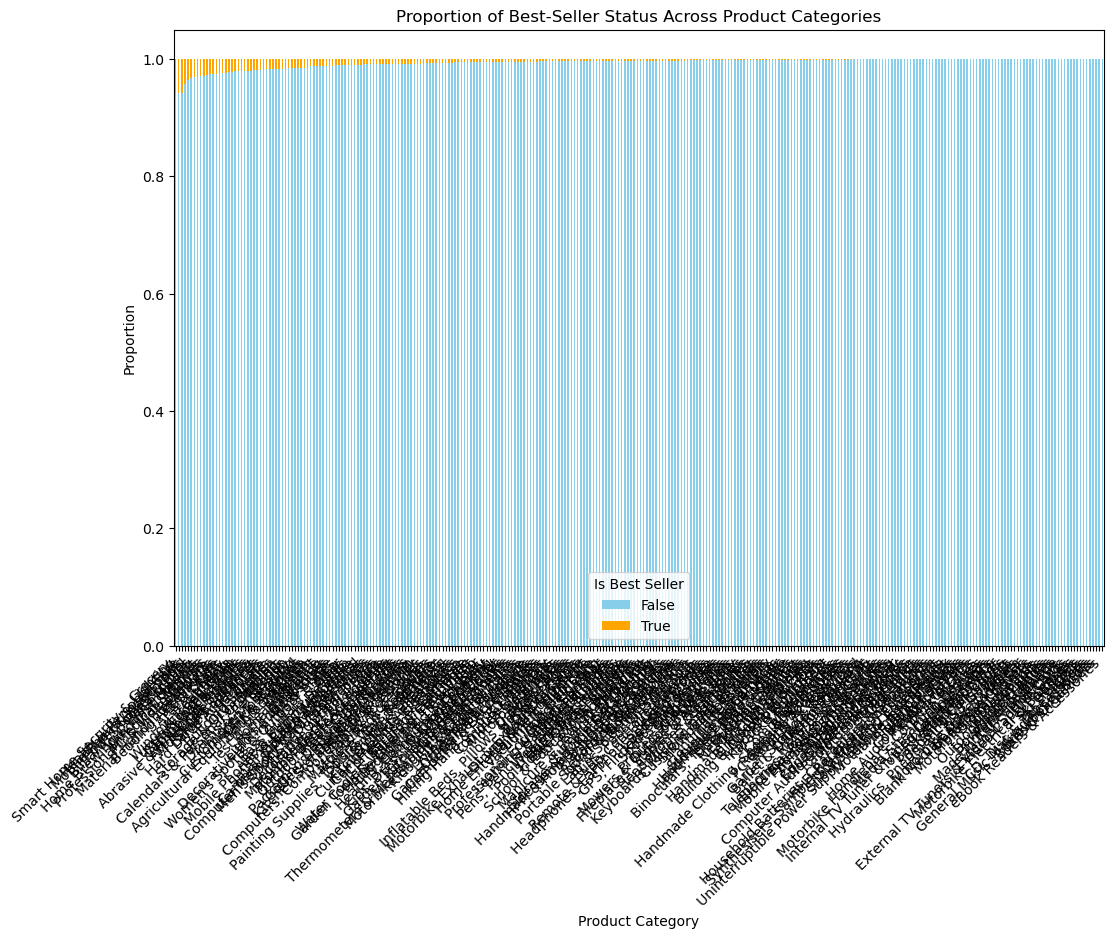

In [11]:
crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Best-Seller Status Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Best Seller')
plt.show()

# Alternatively, for the proportions
sorted_crosstab_proportions.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'])
plt.title('Proportion of Best-Seller Status Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Best Seller')
plt.show()

In [14]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df_cleaned

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


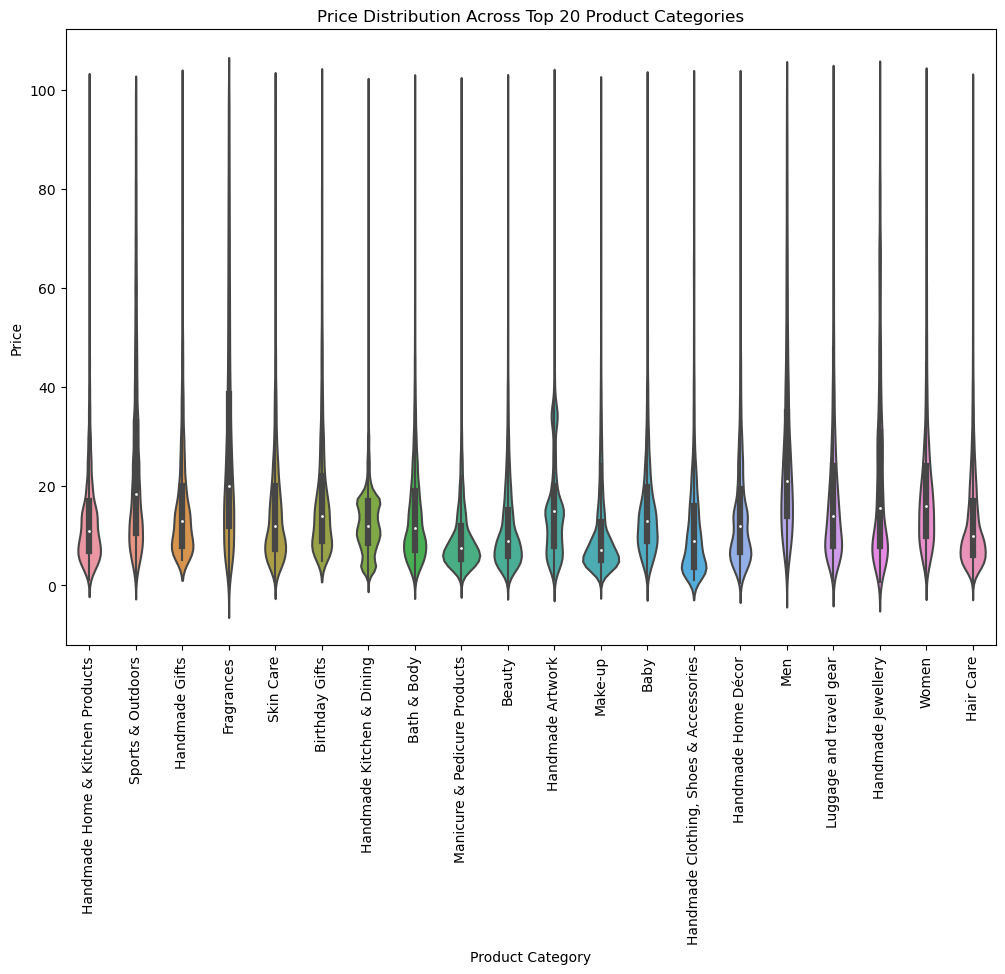

In [17]:
top_20_categories = df_cleaned['category'].value_counts().head(20).index

df_top_20 = df_cleaned[df_cleaned['category'].isin(top_20_categories)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_20)
plt.xticks(rotation=90)
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.show()

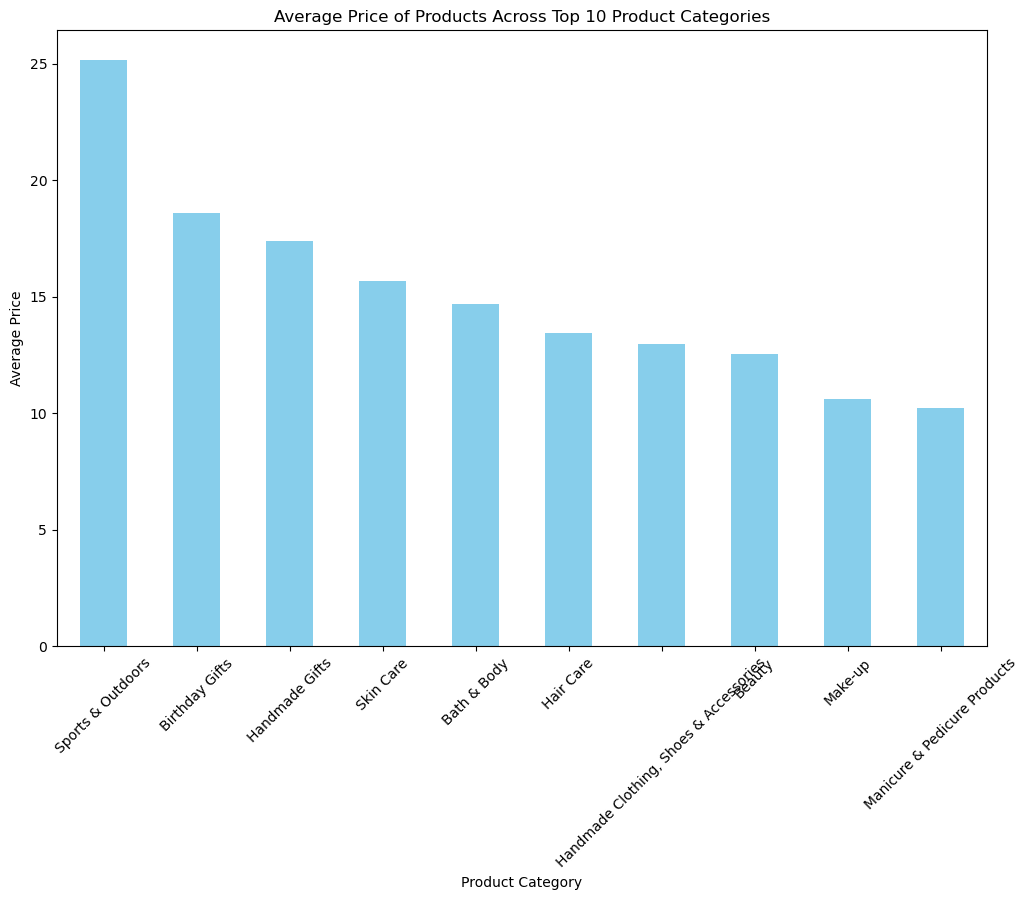

In [18]:
top_10_categories = df_cleaned['category'].value_counts().head(10).index

df_top_10 = df_cleaned[df_cleaned['category'].isin(top_10_categories)]

mean_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

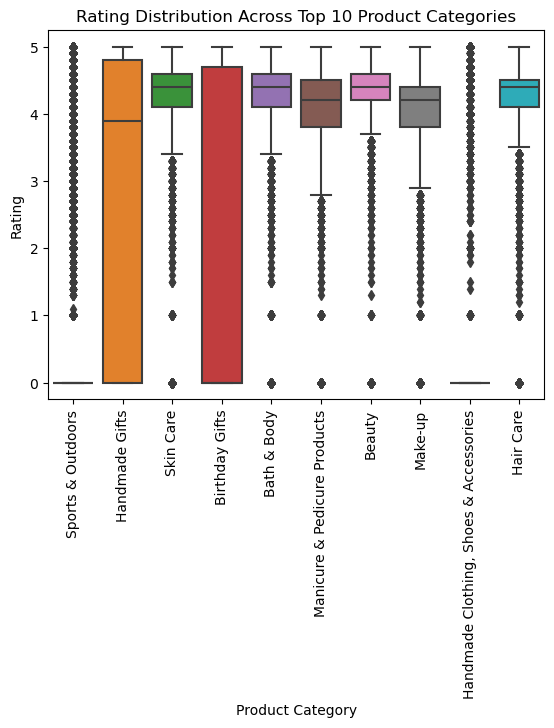

In [19]:
sns.boxplot(x='category', y='stars', data=df_top_10)
plt.xticks(rotation=90)
plt.title('Rating Distribution Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.show()

In [20]:
correlation_coefficient = df['price'].corr(df['stars'])
print(f"Correlation coefficient between price and stars is: {correlation_coefficient}")

Correlation coefficient between price and stars is: -0.1249067326214861


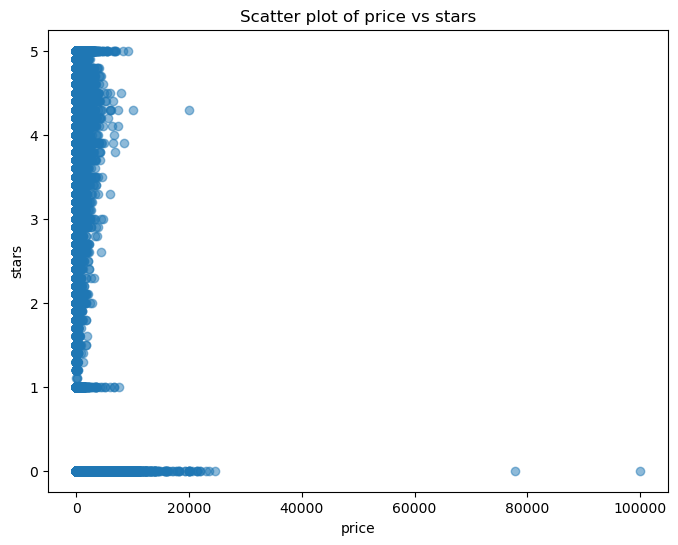

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['stars'], alpha=0.5)
plt.title('Scatter plot of price vs stars')
plt.xlabel('price')
plt.ylabel('stars')
plt.show()

In [23]:
correlation_matrix = df.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

ValueError: could not convert string to float: 'B09B96TG33'

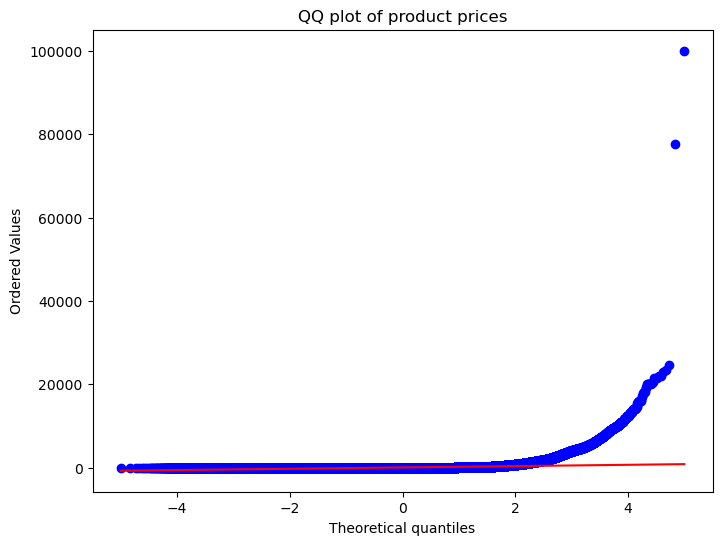

In [24]:
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist='norm', plot=plt)
plt.title('QQ plot of product prices')
plt.show()